# Early_stage_diabetes_risk_prediction 
#extended version

using fastai and ml model

In [1]:
#!pip install -Uqq fastbook
#import fastbook
#fastbook.setup_book()

In [2]:
#from fastbook import *
from fastai.tabular.all import *

path=Path('C:/Users/sajib/JupiterNotebook/Ml/Data science with ML/Early stage diabetes risk prediction using fastai')
path

Path('C:/Users/sajib/JupiterNotebook/Ml/Data science with ML/Early stage diabetes risk prediction using fastai')

In [3]:
df=pd.read_csv(path/'diabetes_data_upload.csv', low_memory=False)

In [4]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [5]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [6]:
df.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [7]:
#Checking for null values
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [8]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
df['class'].unique()

array(['Positive', 'Negative'], dtype=object)

In [10]:
df['Age'].unique()

array([40, 58, 41, 45, 60, 55, 57, 66, 67, 70, 44, 38, 35, 61, 54, 43, 62,
       39, 48, 32, 42, 52, 53, 37, 49, 63, 30, 50, 46, 36, 51, 59, 65, 25,
       47, 28, 68, 56, 31, 85, 90, 72, 69, 79, 34, 16, 33, 64, 27, 29, 26],
      dtype=int64)

In [11]:
df['weakness'].unique()

array(['Yes', 'No'], dtype=object)

Categorify is a TabularProc that replaces a column with a numeric categorical column. FillMissing is a TabularProc that replaces missing values with the median of the column, and creates a new Boolean column that is set to True for any row where the value was missing. These two transforms are needed for nearly every tabular dataset you will use, so this is a good starting point for your data processing:

In [12]:
procs = [Categorify, FillMissing, Normalize]

In [ ]:
#df['Gender'] = df['Gender'].astype('category')
#df['Gender'].cat.set_categories(df['Gender'].unique(), ordered=False, inplace=True)

In [13]:
#https://docs.fast.ai/tutorial.tabular.html
dls=TabularDataLoaders.from_csv(path/'diabetes_data_upload.csv', path=path,
                                y_names='class', #label column
                               cat_names = ['Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity'], #category columns
                               cont_names=['Age'],#continuous columns
                               procs=procs)

#If you get error message: TypeError: Categorical cannot perform the operation median,
#it is most likely that you have one categorical variable flagged as continuous.
#So when it tried to find its median value during FillMissing, it throws an error (sgugger,forum.fast.ai, 2018).

In [14]:
#The show_batch method works like for every other application:
dls.show_batch()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Age,class
0,Male,Yes,Yes,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,48.0,Positive
1,Female,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,53.0,Positive
2,Male,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,Yes,No,46.0,Negative
3,Female,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,Yes,58.0,Positive
4,Male,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,Yes,No,43.0,Negative
5,Male,No,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,56.0,Negative
6,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,35.0,Positive
7,Male,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,No,No,No,55.0,Positive
8,Female,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,40.0,Positive
9,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,55.0,Positive


In [ ]:
#splits=RandomSplitter(valid_pct=0.2)

In [15]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

In [16]:
to = TabularPandas(df, procs=[Categorify, FillMissing,Normalize],
                   cat_names = ['Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity'],
                   cont_names = ['Age'],
                   y_names='class',
                   splits=splits)

In [17]:
to.xs.iloc[:2]

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Age
517,1,2,2,2,2,2,1,2,1,1,1,2,2,1,2,0.797952
91,1,2,2,2,2,2,1,2,2,2,2,2,2,1,1,-0.025536


In [18]:
#dls.xs.iloc[:2]

In [19]:
dls = to.dataloaders(bs=64)

In [20]:
dls.show_batch()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Age,class
0,Male,Yes,No,No,No,No,No,Yes,No,No,No,Yes,No,Yes,No,60.0,Positive
1,Male,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No,Yes,No,56.0,Positive
2,Male,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,57.0,Positive
3,Male,No,No,No,No,Yes,No,No,Yes,No,Yes,No,No,Yes,Yes,58.0,Negative
4,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,54.0,Positive
5,Female,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,55.0,Positive
6,Female,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,45.0,Positive
7,Female,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,Yes,49.0,Positive
8,Male,No,No,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,No,43.0,Negative
9,Female,Yes,No,Yes,Yes,No,No,Yes,No,No,Yes,Yes,Yes,No,No,46.0,Positive


In [21]:
#We can define a model using the tabular_learner method. When we define our model, fastai will try to infer the loss function based on our y_names earlier.
learn=tabular_learner(dls, metrics=accuracy)

In [22]:
#And we can train that model with the fit_one_cycle method (the fine_tune method won't be useful here since we don't have a pretrained model).
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.710319,0.696680,0.451923,00:00


In [23]:
#We can then have a look at some predictions:
#learn.show_results()

In [24]:
#Or use the predict method on a row:
row, clas, probs = learn.predict(df.iloc[0])

In [25]:
row.show()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Age,class
0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,40.0,Negative


In [26]:
clas, probs

(tensor(0), tensor([0.5157, 0.4843]))

In [27]:
#To get prediction on a new dataframe, you can use the test_dl method of the DataLoaders.
#That dataframe does not need to have the dependent variable in its column.
test_df=df.copy()
test_df.drop(['class'], axis=1, inplace=True)

dl=learn.dls.test_dl(test_df)

In [28]:
#Then Learner.get_preds will give you the predictions:
learn.get_preds(dl=dl)

(tensor([[0.5157, 0.4843],
         [0.5178, 0.4822],
         [0.5162, 0.4838],
         ...,
         [0.5176, 0.4824],
         [0.5163, 0.4837],
         [0.5165, 0.4835]]),
 None)

In [29]:
#training more cycles
learn_2 = tabular_learner(dls, metrics=accuracy)
learn_2.fit_one_cycle(16)

epoch,train_loss,valid_loss,accuracy,time
0,0.728208,0.686074,0.548077,00:00
1,0.659951,0.690360,0.548077,00:00
2,0.591872,0.696274,0.548077,00:00
3,0.533566,0.697532,0.548077,00:00
4,0.485049,0.689160,0.548077,00:00
5,0.434686,0.656318,0.548077,00:00
6,0.394336,0.637081,0.548077,00:00
7,0.358488,0.621371,0.548077,00:00
8,0.324596,0.570289,0.586538,00:00
9,0.293712,0.521667,0.605769,00:00


# tabular model accuracy is 96.15%

In [30]:
learn_2.show_results()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Age,class,class_pred
0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.044998,1.0,1.0
1,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,-0.025536,1.0,1.0
2,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,0.633254,0.0,0.0
3,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-0.931372,0.0,0.0
4,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.621439,1.0,1.0
5,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,0.550905,1.0,1.0
6,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.786137,1.0,1.0
7,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.550905,1.0,1.0
8,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.621439,0.0,0.0


In [31]:
#Or use the predict method on a row:
row, clas, probs = learn_2.predict(df.iloc[1])

In [32]:
row.show()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Age,class
0,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,58.0,Positive


In [33]:
to.xs[:3]

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Age
517,1,2,2,2,2,2,1,2,1,1,1,2,2,1,2,0.797952
91,1,2,2,2,2,2,1,2,2,2,2,2,2,1,1,-0.025536
162,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,-1.096070


In [34]:
# Now that everything is encoded, you can then send this off to 
# XGBoost or Random Forests by extracting the train and validation sets and their values:
X_train, y_train = to.train.xs, to.train.ys.values.ravel()
X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

# RandomForestClassifier
using random forest classifier

And now we can directly send X_train, y_train,X_test, y_test in the model.

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier()
rfc

RandomForestClassifier()

In [36]:
from sklearn.metrics import accuracy_score
#training the model
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)
# rnf.score(X_train, y_train)

0.9903846153846154

In [37]:
#testing the model
rfc_pred = rfc.predict(X_test)
accuracy_score(y_test, rfc_pred)

0.9903846153846154

# Vizualization of Feature importance

In [47]:
diabetes_features = [x for i,x in enumerate(df.columns) if i!=16]

In [48]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 16
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)


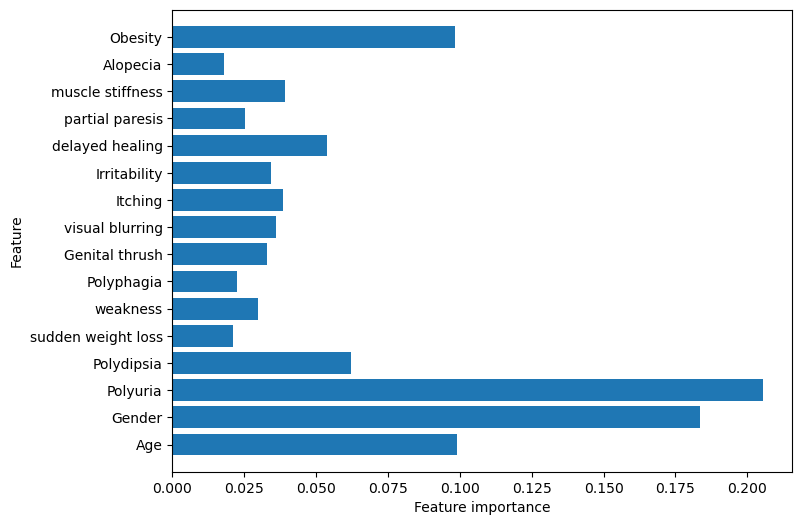

In [49]:
plot_feature_importances_diabetes(rfc)

# Conclusion

we get the higher accuracy from ml model then the tabular model.the accuracy of Random Forest classifier is 99.04%.